In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('day5_data\한국전력공사_지역별 전기차 현황정보_20240731.csv')

df

,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주
0,2023-04-30,62385,29464,87779,15218,16996,19487,15301,3444,22349,26092,15852,19169,10028,26661,26191,6050,35020
1,2023-05-31,63807,30905,90624,15728,17511,20225,15564,3562,23023,26691,16256,19966,10303,27593,27147,6207,35619
2,2023-06-30,65614,32065,93995,16143,17903,20677,15904,3674,23520,27263,16668,20874,10609,28799,28466,6492,36262
3,2023-07-31,66528,33248,97738,16459,18100,21437,16138,3778,24347,27911,17302,21368,10853,30888,29037,6813,36903
4,2023-08-31,67351,34094,99925,16723,18739,21656,16263,3882,24645,28336,17623,21708,11054,31767,30148,6960,37342
5,2023-09-30,68892,35554,103704,17014,19095,22065,16559,4073,25051,28988,18187,22317,11318,32763,31096,7120,37689
6,2023-10-31,70194,36901,107342,17363,19416,23156,16841,4186,25664,29586,18658,22992,11757,34005,32418,7331,38098
7,2023-11-30,71591,38551,111466,17927,19713,23558,17418,4235,26234,30272,19390,23746,12235,35124,33770,7688,38894
8,2023-12-31,72937,40397,114117,18236,19972,24130,17889,4393,26776,30396,19795,24200,12538,36225,34643,7838,39418
9,2024-01-31,72877,40845,114735,18247,20003,24194,17981,4430,26934,30396,19827,24276,12529,36410,34789,7875,39439


In [10]:
df_melt = df.melt(id_vars=['기준일'], var_name='지역', value_name='수(대)')
df_melt

,기준일,지역,수(대)
0,2023-04-30,서울,62385
1,2023-05-31,서울,63807
2,2023-06-30,서울,65614
3,2023-07-31,서울,66528
4,2023-08-31,서울,67351
...,...,...,...
216,2023-12-31,제주,39418
217,2024-01-31,제주,39439
218,2024-05-31,제주,41519
219,2024-06-30,제주,42436


In [11]:
# 파생변수 '년', '월'

df_melt[['년', '월', '일']] = df_melt['기준일'].str.split('-', expand=True)

df_melt

,기준일,지역,수(대),년,월,일
0,2023-04-30,서울,62385,2023,04,30
1,2023-05-31,서울,63807,2023,05,31
2,2023-06-30,서울,65614,2023,06,30
3,2023-07-31,서울,66528,2023,07,31
4,2023-08-31,서울,67351,2023,08,31
...,...,...,...,...,...,...
216,2023-12-31,제주,39418,2023,12,31
217,2024-01-31,제주,39439,2024,01,31
218,2024-05-31,제주,41519,2024,05,31
219,2024-06-30,제주,42436,2024,06,30


In [12]:
df_melt['년도'] = df_melt['기준일'].str[:4]

df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   수(대)    221 non-null    int64 
 3   년       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   년도      221 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.2+ KB


In [13]:
df_melt['년도'] = df_melt['년도'].astype(int)

df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   수(대)    221 non-null    int64 
 3   년       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   년도      221 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 12.2+ KB


In [14]:
df_melt

,기준일,지역,수(대),년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023
...,...,...,...,...,...,...,...
216,2023-12-31,제주,39418,2023,12,31,2023
217,2024-01-31,제주,39439,2024,01,31,2024
218,2024-05-31,제주,41519,2024,05,31,2024
219,2024-06-30,제주,42436,2024,06,30,2024


## 1. 지역별, 년도별 분석

In [15]:
# df_melt.groupby(['지역', '년'], as_index=False)[['수(대)']].mean()

year_avg = df_melt.pivot_table(index='지역', columns='년', values='수(대)', aggfunc='mean')
year_avg

년,2023,2024
지역,,
강원,16756.777778,19032.25
경기,100743.333333,126903.00
경남,31536.111111,40523.75
경북,24623.222222,29210.50
광주,11188.333333,13262.50
대구,28392.777778,31693.00
대전,16430.777778,19073.75
부산,30324.000000,38274.50
서울,67699.888889,76797.75


In [16]:
# 막대그래프, apnda.plot() 이용

import matplotlib.pyplot as plt

<Axes: xlabel='지역'>

findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'Malgun_Gothic' not found.
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\B8-07\AppData\

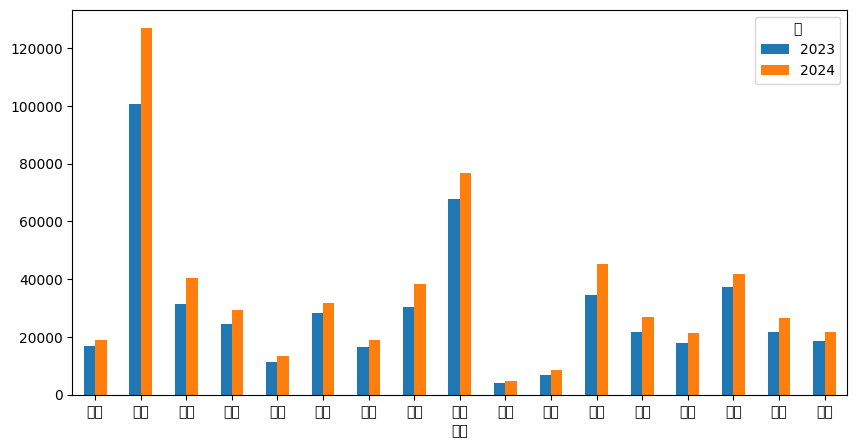

In [17]:
plt.rc('font', family='Malgun_Gothic')

year_avg.plot(kind='bar', figsize=(10,5), rot=0)

## 2023년 데이터 분석 : 지역별, 월별 통계

In [18]:
df_melt

,기준일,지역,수(대),년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023
...,...,...,...,...,...,...,...
216,2023-12-31,제주,39418,2023,12,31,2023
217,2024-01-31,제주,39439,2024,01,31,2024
218,2024-05-31,제주,41519,2024,05,31,2024
219,2024-06-30,제주,42436,2024,06,30,2024


In [19]:
df_melt['년'].unique()

array(['2023', '2024'], dtype=object)

In [20]:
# 2023년 데이터 검색
# 방법 1. df[조건식]
# 방법 2. df.query('조건식')

df_melt[df_melt['년'].astype(int) == 2023]

df_melt_2023 = df_melt.query("년 == '2023'")

In [21]:
# pivot table, 지역별, 월별 자동차 수

month_avg_2023 = df_melt_2023.pivot_table(index='지역', columns='월', values='수(대)', aggfunc='mean')
month_avg_2023

월,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,
강원,15218.0,15728.0,16143.0,16459.0,16723.0,17014.0,17363.0,17927.0,18236.0
경기,87779.0,90624.0,93995.0,97738.0,99925.0,103704.0,107342.0,111466.0,114117.0
경남,26661.0,27593.0,28799.0,30888.0,31767.0,32763.0,34005.0,35124.0,36225.0
경북,22349.0,23023.0,23520.0,24347.0,24645.0,25051.0,25664.0,26234.0,26776.0
광주,10028.0,10303.0,10609.0,10853.0,11054.0,11318.0,11757.0,12235.0,12538.0
대구,26092.0,26691.0,27263.0,27911.0,28336.0,28988.0,29586.0,30272.0,30396.0
대전,15301.0,15564.0,15904.0,16138.0,16263.0,16559.0,16841.0,17418.0,17889.0
부산,26191.0,27147.0,28466.0,29037.0,30148.0,31096.0,32418.0,33770.0,34643.0
서울,62385.0,63807.0,65614.0,66528.0,67351.0,68892.0,70194.0,71591.0,72937.0


<Axes: xlabel='지역'>

findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'Malgun_Gothic' not found.
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\B8-07\AppData\

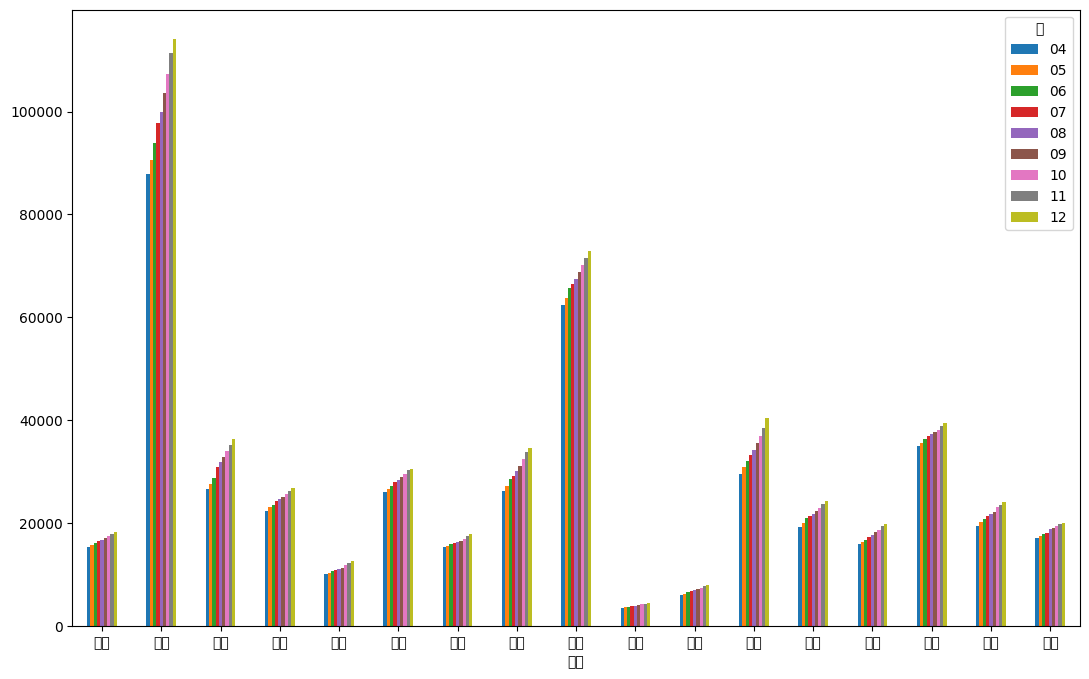

In [22]:
month_avg_2023.plot(kind='bar', figsize=(13,8), rot=0)

검색가능지역들: {sidata}


<Axes: title={'center': '현황'}, xlabel='월'>

findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54889 (\N{HANGUL SYLLABLE HWANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findf

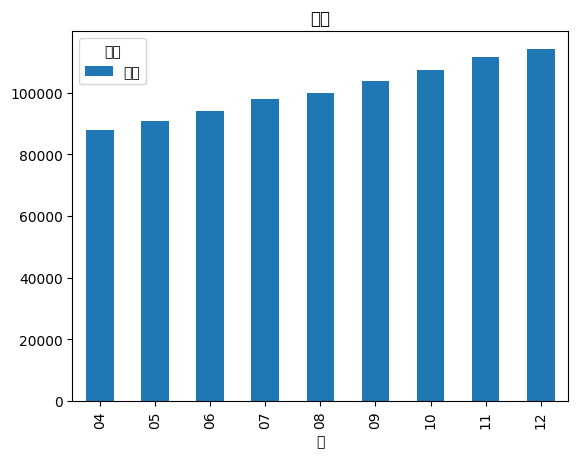

In [23]:

sidata = list(df_melt_2023['지역'].unique())
print('검색가능지역들: {sidata}')
searchin = input('지역입력>> ')
tmp = month_avg_2023[month_avg_2023.index == '경기']
tmp = tmp.T
tmp.plot(kind='bar', title=searchin+'현황')

## 2024 분기별 실적

In [26]:
# 2024 데이터 추출
df_2024 = df_melt.query("년 =='2024'")
df_2024

,기준일,지역,수(대),년,월,일,년도
9,2024-01-31,서울,72877,2024,01,31,2024
10,2024-05-31,서울,76551,2024,05,31,2024
11,2024-06-30,서울,78215,2024,06,30,2024
12,2024-07-31,서울,79548,2024,07,31,2024
22,2024-01-31,인천,40845,2024,01,31,2024
...,...,...,...,...,...,...,...
207,2024-07-31,울산,8883,2024,07,31,2024
217,2024-01-31,제주,39439,2024,01,31,2024
218,2024-05-31,제주,41519,2024,05,31,2024
219,2024-06-30,제주,42436,2024,06,30,2024


In [27]:
# 월의 데이터타입을 정수로 변환

df_2024['월'] = df_2024['월'].astype(int)
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 9 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     68 non-null     object
 1   지역      68 non-null     object
 2   수(대)    68 non-null     int64 
 3   년       68 non-null     object
 4   월       68 non-null     int64 
 5   일       68 non-null     object
 6   년도      68 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 4.2+ KB


C:\Users\B8-07\AppData\Local\Temp\ipykernel_13656\2389857804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['월'] = df_2024['월'].astype(int)


In [28]:
# 사용자 정의 함수 분기 계산

def get_quarter(month):
    if month >= 1 and month <=3:
        return '1분기'
    elif 4 <= month <= 6:
        return '2분기'
    elif 7 <= month <= 9:
        return '3분기'
    elif 10 <= month <= 12:
        return '4분기'
    else:
        return '잘못된 값'
    

df_2024['분기'] = df_2024['월'].map(get_quarter)

C:\Users\B8-07\AppData\Local\Temp\ipykernel_13656\2176268411.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['분기'] = df_2024['월'].map(get_quarter)


In [33]:
# lambda 표현식으로 분기 계산

df_2024['분기_lambda'] = df_2024['월'].map(lambda month : '1분기' if 1 <= month <= 3 else
                                   '2분기' if 4 <= month <= 6 
                                    else '3분기' if 7 <= month <= 9
                                    else '4분기' if 10 <= month <= 12
                                    else '잘못된 값')

C:\Users\B8-07\AppData\Local\Temp\ipykernel_13656\1082860092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['분기_lambda'] = df_2024['월'].map(lambda month : '1분기' if 1 <= month <= 3 else


In [37]:
df_2024

,기준일,지역,수(대),년,월,일,년도,분기,분기_2,분기_lambda
9,2024-01-31,서울,72877,2024,1,31,2024,1분기,1분기,1분기
10,2024-05-31,서울,76551,2024,5,31,2024,2분기,2분기,2분기
11,2024-06-30,서울,78215,2024,6,30,2024,2분기,2분기,2분기
12,2024-07-31,서울,79548,2024,7,31,2024,3분기,3분기,3분기
22,2024-01-31,인천,40845,2024,1,31,2024,1분기,1분기,1분기
...,...,...,...,...,...,...,...,...,...,...
207,2024-07-31,울산,8883,2024,7,31,2024,3분기,3분기,3분기
217,2024-01-31,제주,39439,2024,1,31,2024,1분기,1분기,1분기
218,2024-05-31,제주,41519,2024,5,31,2024,2분기,2분기,2분기
219,2024-06-30,제주,42436,2024,6,30,2024,2분기,2분기,2분기


In [42]:
# 지역별, 분기별 자동차 수 평균, pivot table

df_2024_pivot = df_2024.pivot_table(index='지역', columns='분기', values='수(대)', aggfunc=['mean', 'count'])

<Axes: xlabel='지역'>

findfont: Font family 'Malgun_Gothic' not found.
findfont: Font family 'Malgun_Gothic' not found.
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'Malgun_Gothic' not found.
C:\Users\B8-07\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\B8-07\AppData\

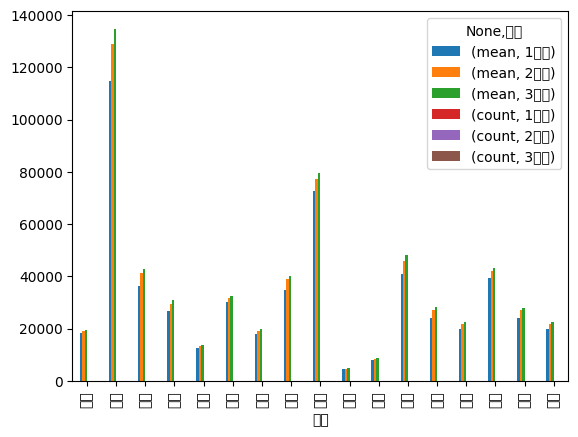

In [44]:
df_2024_pivot.plot(kind='bar')